In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact, Select
from IPython.display import display

In [2]:
df= pd.read_csv('datasets\dataset.csv')
df=df.sort_values(by=['user_id','date_created'])

In [3]:
if 'keep_drop' not in df.columns:
    df['source'] = df['book'] + "_" + df['chapter'].str.strip()
    df['target'] = df['source'].shift(-1)
    df['from'] = df['source'].shift(1)
    df['user_next'] = df['user_id'].shift(-1)
    df['user_prev'] = df['user_id'].shift(1)
    df.loc[df['user_id'] != df['user_next'], 'target'] = 'last'
    df.loc[df['user_id'] != df['user_prev'], 'from'] = 'first'
    
    df['same'] = df['source'] == df['target']
    df['pair'] = df['user_id'].astype(str) + "#" + df['source'] + "#" + df['target']
else:
    print('already done')

In [4]:
df.drop_duplicates(subset=['pair'], keep='first', inplace=True)
df.drop(labels=['pair', 'user_next', 'user_prev'], axis='columns', inplace=True)
df = df[df['target'] != 'last']

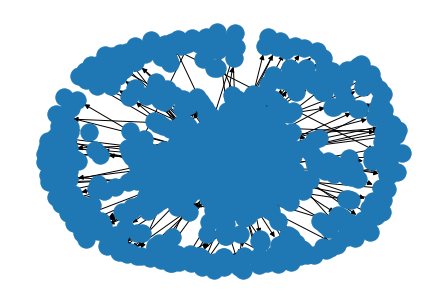

In [7]:
G=nx.from_pandas_edgelist(df, 'source', 'target', create_using=nx.DiGraph)
nx.draw(G)

In [8]:
out=nx.out_degree_centrality(G)
nx.set_node_attributes(G, out, 'out-degree')

bb = nx.betweenness_centrality(G)
nx.set_node_attributes(G, bb, 'betweenness')

eigen= nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigen, 'eigen')

In [9]:
data_list=list(G.nodes(data=True))

In [24]:
data={}
data['book']=[x[0] for x in data_list]
data['out-degree'] = [x[1]['out-degree'] for x in data_list]
data['eigen'] = [x[1]['eigen'] for x in data_list]
data['betweenness'] = [x[1]['betweenness'] for x in data_list]
df1 = pd.DataFrame(data)
df1.sort_values(by='betweenness', ascending=False)

,book,out-degree,eigen,betweenness
123,skeet5_chapter-2,0.009132,1.122242e-01,0.058566
160,skeet5_chapter-5,0.007610,1.180530e-01,0.049170
356,richardson3_chapter-1,0.008371,1.281290e-01,0.047021
362,riscutia_chapter-1,0.006088,7.682447e-02,0.042360
84,chollet_chapter-1,0.006849,1.119546e-01,0.041029
...,...,...,...,...
228,saumont2_chapter-7,0.000761,6.317183e-04,0.000000
233,atencio_chapter-3,0.002283,8.713017e-24,0.000000
234,atencio_chapter-4,0.000761,2.570340e-22,0.000000
241,windmill_chapter-4,0.001522,1.297600e-02,0.000000


In [27]:
row1=[n for n in G['skeet5_chapter-2']]
df2= pd.DataFrame(row1)
df3=df2.set_index(0).join(df1.set_index('book'))
df3=df3.sort_values(by=['eigen'],ascending=False)

In [28]:
df3

,out-degree,eigen,betweenness
0,,,
skeet5_chapter-5,0.007610,0.118053,0.049170
skeet5_chapter-2,0.009132,0.112224,0.058566
chollet_chapter-1,0.006849,0.111955,0.041029
meeks_chapter-1,0.002283,0.067399,0.005612
thymegobbel2_chapter-1,0.004566,0.054067,0.019874
stevens2_chapter-2,0.002283,0.051817,0.002839
osherove2_chapter-2,0.002283,0.046139,0.007187
farrell_chapter-1,0.001522,0.040009,0.003019
mcfedries_about-this-book,0.002283,0.030510,0.009505
